In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the synthetic dataset
df = pd.read_csv('../data/loan_data_large.csv')

# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression

# Handle convergence and class imbalance
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = model.predict(X_test)

# Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


✅ Accuracy: 0.55
📊 Confusion Matrix:
 [[ 1  4]
 [ 5 10]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.71      0.67      0.69        15

    accuracy                           0.55        20
   macro avg       0.44      0.43      0.44        20
weighted avg       0.58      0.55      0.56        20



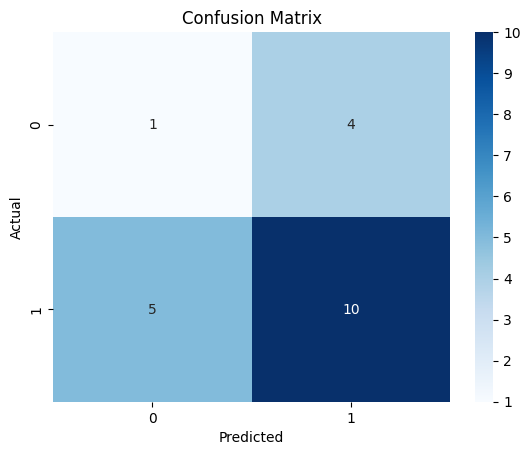

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("🌳 Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))


🌳 Decision Tree Accuracy: 0.65
